## SVM
- 선을 구성하는 매개변수를 조정해서 요소들을 구분하고 선을 찾고 이를 기반으로 패턴 인식
- 패턴들과의 거리(마진)을 최대로 만드는 것이 가장 좋은 결과를 얻음

### SVM을 활용한 비만도(BMI) 측정 예측
- BMI 몸무게(kg) / (키(m) * 키(m))
- BMI가 18.5 이상 25 미만이면 표준, 25 이상이면 비만, 18.5 미만이면 저체중으로 분류

### BMI 데이터 생성
- 데이터 획득을 위해 무작위로 2만명의 데이터를 생성
- 키(cm), 몸무게(kg), Label(저체중(thin), 표준(normal), 비만(fat))


In [90]:
import numpy as np
np.random.seed(42)

In [91]:
# 키와 몸무게로 비만도 생성 함수
def calc_bmi(h, w):
    result = ''
    bmi = w / (h/100) ** 2
    if bmi < 18.5:
        result = 'thin'
    elif bmi < 25:
        result = 'normal'
    else:
        result = 'fat'
    return result


In [92]:
calc_bmi(182, 77)

'normal'

In [93]:
# 출력 파일 준비하기 
fp = open('../Data/bmi.csv', 'w', encoding='utf-8')
fp.write('height,weight,label\n')

# 무작위로 데이터 생성하기
cnt = {'thin':0, 'normal':0, 'fat':0}
for _ in range(20000):
    h = np.random.randint(120, 200)
    w = np.random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write(f'{h},{w},{label}\n')



fp.close()

In [94]:
cnt

{'thin': 6338, 'normal': 6045, 'fat': 7617}

---
### BMI 공식을 사용하지 않고 BMI 예측

In [95]:
import pandas as pd

In [96]:
tbl = pd.read_csv('../Data/bmi.csv')
tbl.head()

,height,weight,label
0,171,63,normal
1,134,77,fat
2,191,55,thin
3,194,45,thin
4,143,37,thin


In [97]:
tbl.tail()


,height,weight,label
19995,123,64,fat
19996,165,64,normal
19997,132,71,fat
19998,173,45,thin
19999,177,53,thin


In [98]:
tbl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   height  20000 non-null  int64 
 1   weight  20000 non-null  int64 
 2   label   20000 non-null  object
dtypes: int64(2), object(1)
memory usage: 468.9+ KB


In [99]:
tbl.describe()

,height,weight
count,20000.000000,20000.000000
mean,159.455500,57.050800
std,23.091948,12.928626
min,120.000000,35.000000
25%,139.000000,46.000000
50%,160.000000,57.000000
75%,179.000000,68.000000
max,199.000000,79.000000


> mean과 50% 가 비슷하면 정규분포

### SVM은 정규화가 필요하다.

### 정규화
- 컬럼별로 최대값을 구해 최대값을 1로 만드는 작업

In [100]:
w = tbl.weight / tbl.weight.max()
h = tbl.height / tbl.height.max()
label = tbl.label

In [101]:
# Feature Data
wh = pd.concat([w, h], axis='columns')
wh


,weight,height
0,0.797468,0.859296
1,0.974684,0.673367
2,0.696203,0.959799
3,0.569620,0.974874
4,0.468354,0.718593
...,...,...
19995,0.810127,0.618090
19996,0.810127,0.829146
19997,0.898734,0.663317
19998,0.569620,0.869347


In [102]:
from sklearn.model_selection import train_test_split

In [103]:
# Train과 Test 데이터 분리
train_data, test_data, train_target, test_target = train_test_split(
    wh, 
    label,
    random_state=42,
    stratify=label
)

In [104]:
# SVM
from sklearn import svm

In [105]:
# 모델 불러오기
clf = svm.SVC()

In [106]:
# 학습시키기
clf.fit(train_data, train_target)


SVC()

In [107]:
print('Train :', clf.score(train_data, train_target))
print('Test :', clf.score(test_data, test_target))

Train : 0.9966
Test : 0.9944


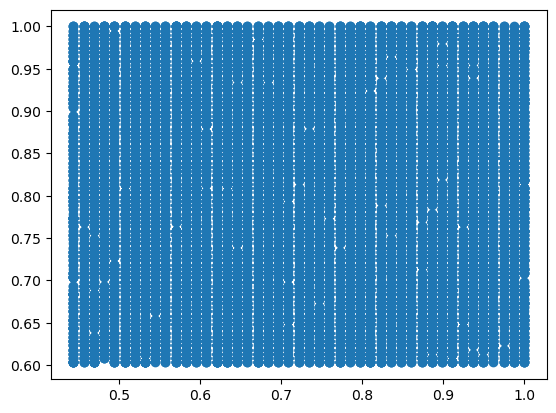

In [108]:
import matplotlib.pyplot as plt
fig = plt.figure()
seq = range(20000)

plt.scatter(
    train_data['weight'],
    train_data['height'],
)

In [109]:
# label을 Index
tbl.index = seq
tbl.set_index('label', inplace=True)
tbl.head()







,height,weight
label,,
normal,171,63
fat,134,77
thin,191,55
thin,194,45
thin,143,37


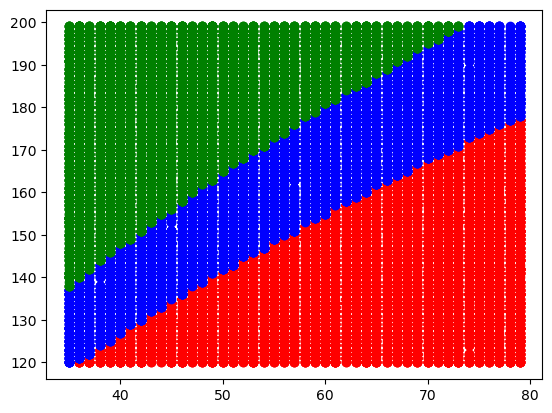

In [111]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def scatter1(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(
        b['weight'],    
        b['height'],
        c=color,
        label=lbl
    )


scatter1('fat', 'red')
scatter1('normal', 'blue')
scatter1('thin', 'green')